In [3]:
import numpy as np
from scipy.constants import c
from matplotlib import pyplot as plt
from pyrem.radiotelescope import airy_beam
     # Import the basic class


### The Fourier Transform of an Airy Intensity Pattern

The non general solution for two identical apertures is given below. Now we should either convolve this, or go back to imagine domain and attempt to convole two airy power beams with gaussian beams.

In [4]:
def fourier_beam(u, d=4, nu1=150e6, nu2 = 150e6):
    k1 = 2*np.pi*nu1/c
    k2 = 2*np.pi*nu2/c
    
    response = np.zeros_like(u)
    u1 = u[u <= 0.5*k1*d + 0.5*k2*d ]
    response[u <= 0.5*k1*d + 0.5*k2*d ] = 1/np.pi*(np.arccos(u1/(k1*d)) - u1/(k1*d)*np.sqrt(1-(u1/(k1*d))**2)) + \
               1/np.pi*(np.arccos(u1/(k2*d)) - u1/(k2*d)*np.sqrt(1-(u1/(k2*d))**2)) 
    response[u > 0.5*k1*d + 0.5*k2*d ] = 0
    
    return response

/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/pyREM-0.1.0-py3.7.egg/pyrem/radiotelescope.py:221: RuntimeWarning: invalid value encountered in true_divide


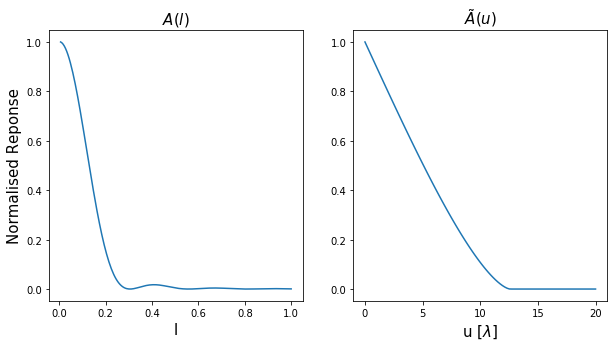

In [5]:
theta = np.linspace(0, np.pi/2, 300)
u = np.linspace(0, 20, 100)
r = fourier_beam(u=u, d = 4)

figure, axes = plt.subplots(1,2, figsize = (10,5))
axes[0].plot(np.sin(theta), airy_beam(theta,  diameter=4))
axes[1].plot(u, r)
axes[0].set_ylabel("Normalised Reponse", fontsize =15)
axes[0].set_xlabel("l", fontsize =15)
axes[1].set_xlabel("u [$\lambda$]", fontsize =15)

axes[0].set_title("$A(l)$", fontsize =15)
axes[1].set_title("$\~{A}(u)$", fontsize =15)

plt.show()

## Numerical Verification of Analytic solutions

We use Steven Murray's Hankel library to compare our analytic result with a numerical result

In [18]:
ht = HankelTransform(
    nu= 0,     # The order of the bessel function
    N = 120,   # Number of steps in the integration
    h = 0.03   # Proxy for "size" of steps in integration
)

u = np.linspace(0, 100, 100)
function = lambda
numerical = ht.transform(, u)

/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/hankel/hankel.py:192: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int_res = quad(integrand, 0, np.inf)


In [31]:
from scipy.constants import c 
def convolve(r, r1 = 2, r2 = 3):
    
    beam = r1*np.arccos((r**2 + r1**2 - r2**2)/(2*r*r1)) - (r**2 + r1**2 - r2**2)/(2*r)*np.sqrt(1-(r**2 + r1**2 - r2**2)/(2*r*r1))
    return beam


def geometric(r, d=6, nu2=150e6, nu1=150e6):
    k1 = 2*np.pi*nu1/c
    k2 = 2*np.pi*nu2/c
    b = d**2*(k1**2 - k2**2)
    
    beam = np.zeros_like(r)
    r0 = r[( (k1 - k2)*d <= r) & (r <= (k1 + k2)*d) ]
    
    a1 = (k1*d)**2*(np.arccos((r0**2 + b)/(2*r0*k1*d) ) - (r0**2 + b)/(2*r0*k1*d)*np.sqrt(1 - ((r0**2 + b)/(2*r0*k1*d))**2))
    a2 = (k2*d)**2*(np.arccos((r0**2 - b)/(2*r0*k2*d) ) - (r0**2 - b)/(2*r0*k2*d)*np.sqrt(1 - ((r0**2 - b)/(2*r0*k2*d))**2))  
    
    beam[:] = np.nan
    beam[r < (k1 - k2)*d] = np.pi*(k1*d)**2
    beam[(r >= (k1 - k2)*d ) & (r <= (k1 + k2)*d) ] = a1 + a2
    beam[r > (k1 + k2)*d] = 0
    return beam

2.82939077963477
3.1437675329275225
3.1437675329275225


/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arccos
/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos
/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: R

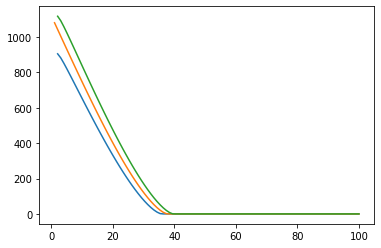

In [32]:
r = np.linspace(0, 100, 100)
beam1 = geometric(r, nu1=135e6, nu2=150e6)
beam2 = geometric(r, nu1=150e6, nu2=150e6)
beam3 = geometric(r, nu1=150e6, nu2=165e6)

plt.plot(r, beam1)
plt.plot(r, beam2)
plt.plot(r, beam3)

# plt.plot(r, np.zeros_like(r) + np.pi*4/4)

# Numerical Attempt with the Hankel Transform

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import jv
from scipy.constants import c
import hankel

from hankel import SymmetricFourierTransform
from pyrem.skymodel import sky_moment_returner


In [6]:
def airy_disk(l, nu=150e6, d =0.7*4):
    k = 2*np.pi*nu/c
    print(k*d)
    response = 2*jv(1, k*d*l)/(k*d*l)
    return response

In [47]:
# ht = HankelTransform(
#     nu= 0,     # The order of the bessel function
#     N = 1200,# Number of steps in the integration
#     h = 0.00003   # Proxy for "size" of steps in integration
# )

ht = SymmetricFourierTransform(
    ndim= 2,     # The order of the bessel function
    N = 120000,   # Number of steps in the integration
    h = 0.0003   # Proxy for "size" of steps in integration
    )

In [51]:
l = np.linspace(0, 1, 100)
u = np.logspace(-1, np.log10(100), 1000)

diameter = 4
nu1 = 150e6
nu2 = 150e6

f = lambda x : (airy_disk(x, nu=nu1, d=diameter)*airy_disk(x, nu=nu2, d=diameter))

In [52]:
hhat = ht.transform(f,u*2*np.pi, ret_err=False)              # Return the transform of f at k.

12.57507013171009
12.57507013171009


12.57507013171009
12.57507013171009


/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


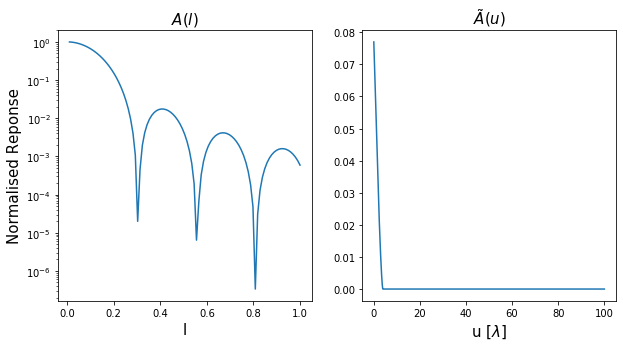

In [53]:
figure, axes = plt.subplots(1,2, figsize = (10,5))
axes[0].semilogy(l, (airy_disk(l, nu=nu1, d=diameter)*airy_disk(l, nu=nu2, d=diameter)))
axes[1].plot(u, hhat)
axes[0].set_ylabel("Normalised Reponse", fontsize =15)
axes[0].set_xlabel("l", fontsize =15)
axes[1].set_xlabel("u [$\lambda$]", fontsize =15)

axes[0].set_title("$A(l)$", fontsize =15)
axes[1].set_title("$\~{A}(u)$", fontsize =15)

plt.show()

In [128]:
from pyrem.powerspectrum import from_frequency_to_eta
from pyrem.powerspectrum import compute_power
from pyrem.generaltools import from_u_to_k_perp
from pyrem.generaltools import from_eta_to_k_par
from matplotlib import colors
from pyrem.plottools import plot_2dpower_spectrum
from pyrem.covariance import sky_covariance

import numpy as np
from matplotlib import pyplot as plt
from scipy.special import jv
from scipy.constants import c
import hankel

from hankel import SymmetricFourierTransform
from pyrem.skymodel import sky_moment_returner

def airy_disk(l, nu=150e6, d =0.7*4):
    k = 2*np.pi*nu/c
    response = 2*jv(1, k*d*l)/(k*d*l)
    return response

def numerical_sky_covariance(u, nu, gamma = 0.8, diameter = 4):
    ht = SymmetricFourierTransform(
    ndim= 2,     # The order of the bessel function
    N = 120,   # Number of steps in the integration
    h = 0.00000003   # Proxy for "size" of steps in integration
    )

    mu_2 = sky_moment_returner(2, s_low=1e-3, s_high=1e-1)
    covariance = np.zeros((len(u0), len(nu), len(nu)))
    for i in range(len(nu)):
        for j in range(i, len(nu)):
            f = lambda x : airy_disk(x, nu=nu[i], d=diameter)**2*airy_disk(x, nu=nu[j], d=diameter)**2
            scales = u0/nu[0]*np.abs(nu[i] - nu[j])
            hhat = ht.transform(f,scales,ret_err=False)              # Return the transform of f at k.
            covariance[:, i, j] = hhat*mu_2*(nu[i]*nu[j]/nu[0]**2)**(-gamma)
            covariance[:, j, i] = hhat*mu_2*(nu[i]*nu[j]/nu[0]**2)**(-gamma)

    return covariance

def analytic_sky_covariance(u, nu):
    covariance = np.zeros((len(u), len(nu), len(nu)))
    for i in range(len(u)):
        covariance[i,:, :] = sky_covariance(u[i], v=0, nu=nu)

    return covariance

In [129]:
nu = np.linspace(135e6, 165e6, 251)
u0 = np.logspace(-1, np.log10(500), 100)

In [130]:
covariance = numerical_sky_covariance(u0, nu)

KeyboardInterrupt: 

In [36]:
analytic_covariance = analytic_sky_covariance(u0, nu) 

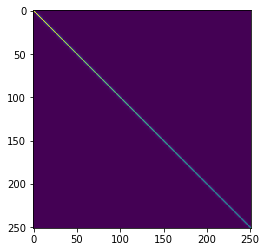

In [65]:
plt.imshow(qcovariance[70,:, :])


In [50]:
eta = from_frequency_to_eta(nu)
z_values = np.zeros((len(u0), len(eta)))

central_frequency = nu[int(len(nu) / 2)]
x_values = from_u_to_k_perp(u0, central_frequency)
y_values = from_eta_to_k_par(eta, central_frequency)
for i in range(len(u0)):
    z_values[i] = compute_power(nu, covariance[i]*1000)

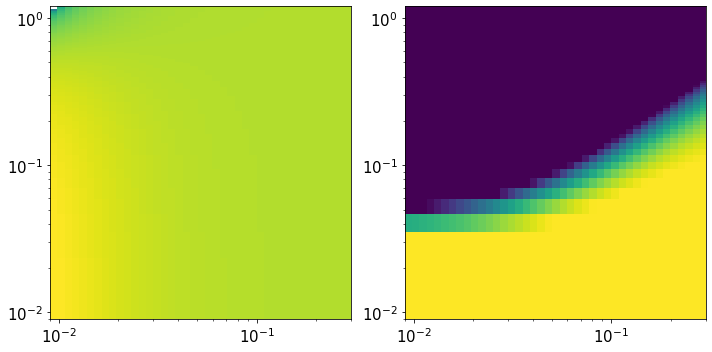

In [51]:
fig, axes = plt.subplots(1,2, figsize= (10, 5))
ps_norm = colors.LogNorm(vmin=1e10, vmax=1e15)

plot_2dpower_spectrum(u0, eta, nu, z_values, axes=axes[0], norm=ps_norm)
plot_2dpower_spectrum(u0, eta, nu, normal_sky_power, axes=axes[1], norm=ps_norm)

fig.tight_layout()


# Convolutions

In [1]:
from scipy import signal
from scipy.constants import c
import numpy as np
from matplotlib import pyplot as plt

def tophat(x, y, d, nu):
    response = np.zeros_like(x)
    k = 2*np.pi*nu/c
    condition = (x**2 + y**2) <= k*d
    response[condition] = 1
    return response
    
    


4123277909.79859


/Users/ronniyjoseph/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


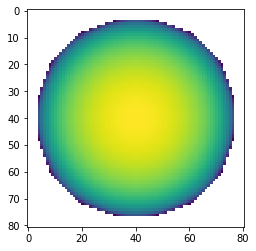

In [15]:

u = np.linspace(-15, 15, 81)
uu, vv = np.meshgrid(u, u)
tophat1 = tophat(uu, vv, d=4, nu=150e6)
tophat2 = tophat(uu, vv, d=4, nu=150e6)
conv = signal.convolve2d(tophat1, tophat2, boundary='symm', mode='same')
conv = signal.convolve2d(conv, conv, boundary='symm', mode='same')
print(conv.max())
plt.imshow(np.log10(conv))